# COMP41680 -  API Assignment
#### Wang Feihong 
#### Student Number  :  15209502

### Task 1: Data identification
### API Chosen:

A single API that was chosen for this assignment was that provided by https://docs.opendota.com/

The API is used to response the data of Dota2 which is my favorite game. 

I can improve the winning rate of Dota2 games by analysing Dota2 data.

The API is freely available, no need to be used by API key, limited to 50,000 free calls per month and 60 requests/minute.

In this assignment, i used two APIs.

First one is https://docs.opendota.com/#tag/players which used to get match ids from the my account.
    
Then i used the game ids in second API: https://docs.opendota.com/#tag/matches ,this API return many informations in the match.



#### Dota2 introduction
Dota 2 is a multiplayer online battle arena (MOBA) video game developed and published by Valve. Dota 2 is played in matches between two teams(Radiant and Dire) of five players, with each team occupying and defending their own separate base on the map. Each of the ten players independently controls a powerful character, known as a "hero", who all have unique abilities and differing styles of play. During a match, players collect experience points and items for their heroes to successfully defeat the opposing team's heroes in player versus player combat.Each team has 11 towers to protect the base in front of the base. A team wins by being the first to destroy the other team's "Ancient", a large structure located within their base.

### Task 2: Data collection

In [2]:
import requests
import pandas as pd 
from tqdm import tqdm

The following 2 functions were written to use the 2 APIs.

function getMatchId is used to get match ids from the one account. 

function getMatchData is used to get match informations which used the result of getMatchId.

In [2]:
def getMatchId(user_id,number):
	url = 'https://api.opendota.com/api/players/%s/Matches?limit=%s'%(user_id,str(number)) 
    # number varibale is used to indicate the number of matches will be returned
	matches = requests.get(url).json()
	match_ids = [match['match_id'] for match in matches]
	return match_ids

def getMatchData(match_id):
	match_url = 'https://api.opendota.com/api/matches/%s'%(match_id)
	match_data = requests.get(match_url).json()
	return match_data

The following code retreives the raw data using the above Functions from the API and writes it to a CSV file.

I used choosed my account id to be account_id and choose 1400 to be the number of matches.

In [82]:
my_id = '904606353' # my Dota2 account id

In [ ]:
import time
match_ids = getMatchId(my_id,1400)
raw_data = []
for match_id in tqdm(match_ids):
    raw_data.append(getMatchData(match_id))

In [ ]:
# save data to csv file
df = pd.DataFrame(raw_data,index=None)
df.to_csv('raw_data.csv')

### Task 3: Data preparation and analysis: 

This data needs extensive cleaning and manipulation before it can be used.

In [380]:
raw_data = pd.read_csv("raw_data.csv")

In [381]:
raw_data.columns

Index(['Unnamed: 0', 'all_word_counts', 'barracks_status_dire',
       'barracks_status_radiant', 'chat', 'cluster', 'comeback', 'cosmetics',
       'dire_score', 'dire_team_id', 'draft_timings', 'duration', 'engine',
       'first_blood_time', 'game_mode', 'human_players', 'leagueid',
       'lobby_type', 'loss', 'match_id', 'match_seq_num', 'my_word_counts',
       'negative_votes', 'objectives', 'patch', 'picks_bans', 'players',
       'positive_votes', 'radiant_gold_adv', 'radiant_score',
       'radiant_team_id', 'radiant_win', 'radiant_xp_adv', 'region',
       'replay_salt', 'replay_url', 'series_id', 'series_type', 'skill',
       'start_time', 'stomp', 'teamfights', 'throw', 'tower_status_dire',
       'tower_status_radiant', 'version'],
      dtype='object')

In [382]:
raw_data.head()

,Unnamed: 0,all_word_counts,barracks_status_dire,barracks_status_radiant,chat,cluster,comeback,cosmetics,dire_score,dire_team_id,...,series_id,series_type,skill,start_time,stomp,teamfights,throw,tower_status_dire,tower_status_radiant,version
0,0,NaN,0,63,NaN,135,NaN,NaN,16,NaN,...,0.0,0.0,1.0,1581890503,NaN,NaN,NaN,0,1983,NaN
1,1,NaN,51,51,NaN,137,NaN,NaN,43,NaN,...,0.0,0.0,1.0,1581887807,NaN,NaN,NaN,1990,262,NaN
2,2,NaN,63,0,NaN,132,NaN,NaN,31,NaN,...,0.0,0.0,1.0,1581885468,NaN,NaN,NaN,2047,0,NaN
3,3,"{'ggg': 1, 'we': 2, 'lost': 2, 'fuck': 2, 'ggs...",63,0,"[{'time': -60, 'type': 'chatwheel', 'key': '62...",131,720.0,"{'4722': 3, '4723': 3, '4737': 3, '4738': 3, '...",48,NaN,...,0.0,0.0,1.0,1581873380,26745.0,"[{'start': 323, 'end': 369, 'last_death': 354,...",NaN,2038,0,21.0
4,4,NaN,3,63,NaN,191,NaN,NaN,21,NaN,...,0.0,0.0,1.0,1581870851,NaN,NaN,NaN,4,1854,NaN


### Data cleaning

1. remove columns that only have NA or one kind of value. 
Because the column is useless in analysis if it only has one value.

In [383]:
import numpy as np

In [384]:
# the column only have NA value
Na_columns = []
for column in raw_data.columns:
    if raw_data[column].isna().all():
        Na_columns.append(column)

In [385]:
Na_columns

[]

In [386]:
# remove Na columns
data = raw_data.drop(Na_columns,axis=1)

In [387]:
one_value_columns = []
for column in data.columns:
    if len(list(set(data[column]))) == 1:
        one_value_columns.append(column)

In [388]:
one_value_columns

['engine', 'human_players', 'leagueid']

In [389]:
# remove one value columns
data = data.drop(one_value_columns,axis=1)

2.remove the columns that have more than 80% Na. Because these columns lack data to analyze.

In [390]:
# the percentage of Na in each columns
data.isna().sum(axis=0)/len(data) 

Unnamed: 0                 0.000000
all_word_counts            0.674286
barracks_status_dire       0.000000
barracks_status_radiant    0.000000
chat                       0.674286
cluster                    0.000000
comeback                   0.852143
cosmetics                  0.674286
dire_score                 0.000000
dire_team_id               0.994286
draft_timings              0.674286
duration                   0.000000
first_blood_time           0.000000
game_mode                  0.000000
lobby_type                 0.000000
loss                       0.822143
match_id                   0.000000
match_seq_num              0.000000
my_word_counts             0.674286
negative_votes             0.000000
objectives                 0.674286
patch                      0.000000
picks_bans                 0.505000
players                    0.000000
positive_votes             0.000000
radiant_gold_adv           0.674286
radiant_score              0.000000
radiant_team_id            0

In [391]:
eighty_Na_columns = []
for column in data.columns:
    if data[column].isna().sum(axis=0)/len(data)>0.8:
        eighty_Na_columns.append(column)


In [392]:
eighty_Na_columns
# the columns which have more then 80% Na

['comeback', 'dire_team_id', 'loss', 'radiant_team_id', 'stomp', 'throw']

In [393]:
# remove them
data = data.drop(eighty_Na_columns,axis=1)

3.According to the columns explaination in https://docs.opendota.com/#tag/matchesremove. I removed some columns i will not use in this assignment.

In [394]:
data = data.drop(['Unnamed: 0','all_word_counts','chat','cluster','cosmetics','draft_timings',
           'lobby_type','game_mode','match_id','match_seq_num',
              'negative_votes','objectives','patch','picks_bans','players','positive_votes',
               'region','replay_salt','replay_url','series_id','series_type','skill','start_time',
                  'teamfights','version','radiant_gold_adv','radiant_xp_adv','my_word_counts'],axis=1)

In [395]:
# check if it has missing value
data.isna().sum(axis=0)

barracks_status_dire       0
barracks_status_radiant    0
dire_score                 0
duration                   0
first_blood_time           0
radiant_score              0
radiant_win                0
tower_status_dire          0
tower_status_radiant       0
dtype: int64

In [396]:
data[['duration','first_blood_time']].head()

,duration,first_blood_time
0,2001,201
1,2243,84
2,1829,3
3,2091,119
4,2081,12


Changing the units of 'duration','first_blood_time' columns from seconds to mintues and keeping one decimal place that can be easier visualised and analyze.

In [397]:
data['duration'] = round(data['duration']/60,1)
data['first_blood_time'] = round(data['first_blood_time']/60,1)

In [398]:
data[['duration','first_blood_time']].head()

,duration,first_blood_time
0,33.4,3.4
1,37.4,1.4
2,30.5,0.0
3,34.8,2.0
4,34.7,0.2


In [399]:
data['radiant_win'] = data['radiant_win'].replace(True,1)

In [400]:
data['dire_win'] = data['radiant_win'].apply(lambda x:x==0)
data['dire_win'] = data['dire_win'].replace(True,1)

In [401]:
data[['radiant_win','dire_win']].head()

,radiant_win,dire_win
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [402]:
def Bit2Dec(n):
	return str(bin(n))[2:].count('1')
#change bit to decimal

In [403]:
data['tower_status_radiant'] = data['tower_status_radiant'].apply(lambda x:Bit2Dec(x))
data['tower_status_dire'] = data['tower_status_dire'].apply(lambda x:Bit2Dec(x))
data['barracks_status_radiant'] = data['barracks_status_radiant'].apply(lambda x:Bit2Dec(x))
data['barracks_status_dire'] = data['barracks_status_dire'].apply(lambda x:Bit2Dec(x))

In [5]:
# check if it has missing value
data.isna().sum(axis=0)

barracks_status_dire       0
barracks_status_radiant    0
dire_score                 0
duration                   0
first_blood_time           0
radiant_score              0
radiant_win                0
tower_status_dire          0
tower_status_radiant       0
dire_win                   0
dtype: int64

clean up!
Then save the cleaned data to csv.

In [405]:
data.to_csv('dota2_data.csv',index=None)

### Analysis

In [3]:
data = pd.read_csv('dota2_data.csv')

In [261]:
data.head()

,barracks_status_dire,barracks_status_radiant,dire_score,duration,first_blood_time,radiant_score,radiant_win,tower_status_dire,tower_status_radiant,dire_win
0,0,6,16,33.4,3.4,37,1.0,0,10,0.0
1,4,4,43,37.4,1.4,35,0.0,7,3,1.0
2,6,0,31,30.5,0.0,15,0.0,11,0,1.0
3,6,0,48,34.8,2.0,16,0.0,9,0,1.0
4,2,6,21,34.7,0.2,53,1.0,1,8,0.0


In [262]:
data.describe() #describe the dataset

,barracks_status_dire,barracks_status_radiant,dire_score,duration,first_blood_time,radiant_score,radiant_win,tower_status_dire,tower_status_radiant,dire_win
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,3.494286,3.712143,35.390000,38.328571,1.578929,36.397143,0.551429,3.849286,4.564286,0.448571
std,2.407392,2.505319,14.125372,9.607816,1.365031,13.252299,0.497526,3.580105,3.956899,0.497526
min,0.000000,0.000000,0.000000,13.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,2.000000,24.000000,31.700000,0.400000,27.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,36.000000,37.600000,1.400000,37.000000,1.000000,3.000000,4.000000,0.000000
75%,6.000000,6.000000,46.000000,44.225000,2.300000,46.000000,1.000000,7.000000,8.000000,1.000000
max,6.000000,6.000000,84.000000,76.700000,10.100000,74.000000,1.000000,11.000000,11.000000,1.000000


from the descriptive statistic, the dataset seemed to be cleaned.

In [5]:
import matplotlib
import matplotlib.pyplot as plt

### bar chart

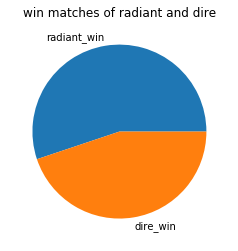

In [9]:
plt.figure()

radiant_win = list(data['radiant_win'].values).count(1)
dire_win = list(data['dire_win'].values).count(1)
# fig, ax = plt.subplots()
# plt.title("Win rate of dire and radiant")

# xticks = range(0,2)
# ax.set_xticks(xticks)
# ax.bar(xticks,[dire_win,radiant_win]) 
# ax.set_xticklabels(['dire_win','radiant_win'], rotation=45)

labels = ['radiant_win','dire_win']
sizes = [radiant_win,dire_win]
plt.pie(sizes,labels=labels)

plt.title("win matches of radiant and dire")
plt.show()


Different teams as game designers should have the same winning percentage, but in my data set, Radiant's winning percentage is significantly higher than the Dire which prove that Radiant will have an advantage in some aspects.

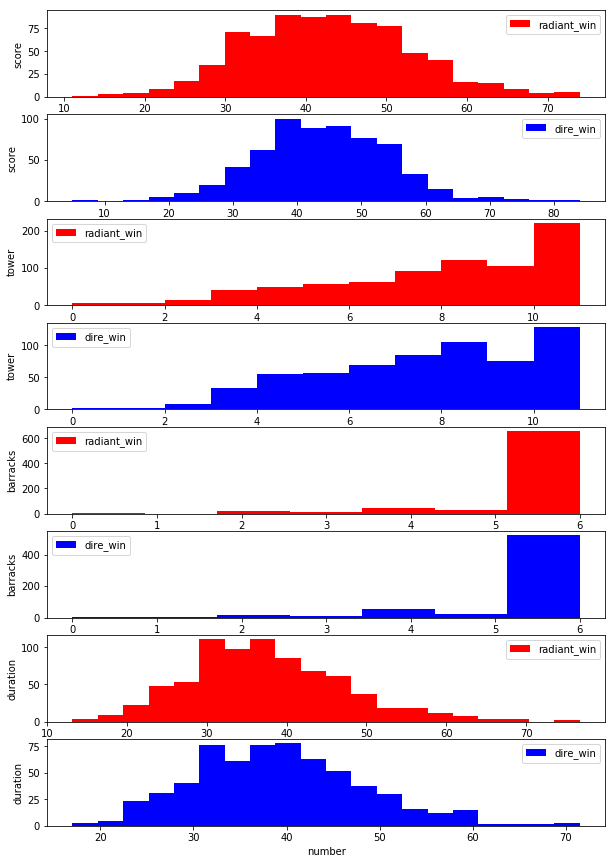

In [265]:
radiant_wins = data[data['radiant_win']==1] #the game radiant win
dire_wins = data[data['dire_win']==1] #the game dire win


fig, ax = plt.subplots(1,8,figsize=(10,15))

axe1 = plt.subplot(811)
axe1.hist(radiant_wins['radiant_score'],color='r',bins=20,label='radiant_win')
plt.legend()
plt.xlabel("number")
plt.ylabel("score")

axe1 = plt.subplot(812)
axe1.hist(dire_wins['dire_score'],color='b',bins=20,label='dire_win')
plt.legend()
plt.xlabel("number")
plt.ylabel("score")

axe2 = plt.subplot(813)
axe2.hist(radiant_wins['tower_status_radiant'],color='r',bins=11,label='radiant_win') 
plt.legend()
plt.xlabel("number")
plt.ylabel("tower")

axe2 = plt.subplot(814)
axe2.hist(dire_wins['tower_status_dire'],color='b',bins=11,label='dire_win') 
plt.legend()
plt.xlabel("number")
plt.ylabel("tower")

axe3 = plt.subplot(815)
axe3.hist(radiant_wins['barracks_status_radiant'],color='r',bins=7,label='radiant_win') 
plt.legend()
plt.xlabel("number")
plt.ylabel("barracks")

axe3 = plt.subplot(816)
axe3.hist(dire_wins['barracks_status_dire'],color='b',bins=7,label='dire_win') 
plt.legend()
plt.xlabel("number")
plt.ylabel("barracks")

axe4 = plt.subplot(817)
axe4.hist(radiant_wins['duration'],color='r',bins=20,label='radiant_win') 
plt.legend()
plt.xlabel("number")
plt.ylabel("duration")

axe4 = plt.subplot(818)
axe4.hist(dire_wins['duration'],color='b',bins=20,label='dire_win') 
plt.legend()
plt.xlabel("number")
plt.ylabel("duration")

plt.show()

Bar Graph show how the facts(Score,barracks,towers) and win(each team) interact. 
Score and duration doesn't seem to influence the game result. 
We need to destroy as many towers and barracks as possible in the game. Simultaneously, do more defencing.

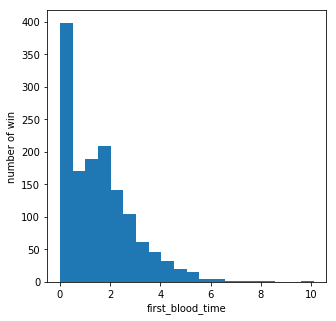

In [266]:
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(data['first_blood_time'],bins=20)
plt.xlabel("first_blood_time")
plt.ylabel("number of win")
plt.show()

Bar Graph show how the first_blood_time and win interact. 
It seems that the sooner the first blood drops, the more possible the team win.

### scatter graph

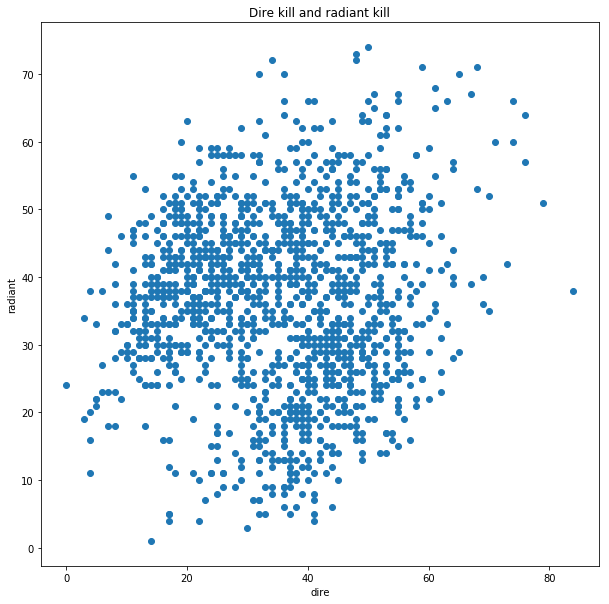

In [267]:
plt.figure(figsize=(10,10))
plt.scatter(data['dire_score'],data['radiant_score'])
plt.title("Dire kill and radiant kill")
plt.ylabel("radiant")
plt.xlabel("dire")
plt.show()

The graph show the scores of two teams.
Unexpectedly, the scores of the two teams are positively related.
If one team is too aggressive, it will cause a strong resistance from the other team.

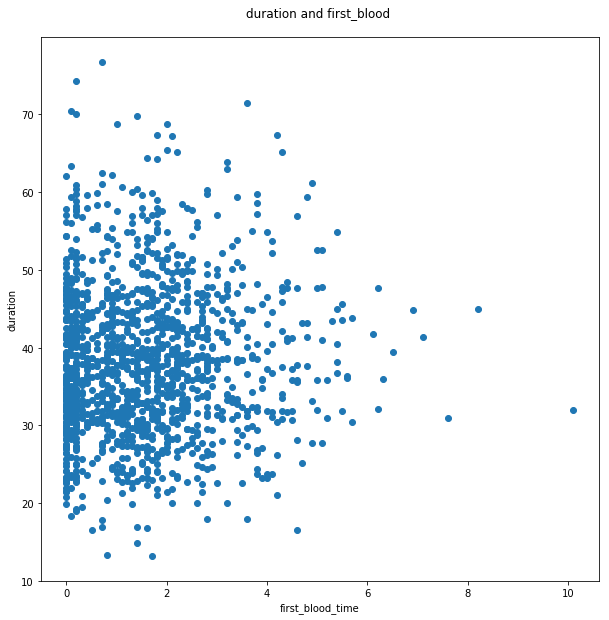

In [283]:
plt.figure(figsize=(10,10))
plt.scatter(data['first_blood_time'],data['duration'])
plt.title("duration and first_blood \n")
plt.ylabel("duration")
plt.xlabel("first_blood_time")
plt.show()

The sooner the first blood drops, the sooner the game ends


### Dual Axis Line Graphs

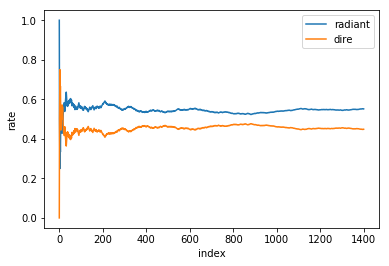

In [303]:
# calculate win rate during 1400 games
radiant_win_rates=[]
dire_win_rates=[]

wins = 0
i = 0 
for r in data['radiant_win']:
    i+=1
    wins+=r
    radiant_win_rates.append(wins/i)
    
wins = 0
i = 0 
for r in data['dire_win']:
    i+=1
    wins+=r
    dire_win_rates.append(wins/i)

fig = plt.figure()
plt.plot(radiant_win_rates,label='radiant')

ax1 = fig.add_subplot(111)
ax1.plot(dire_win_rates,label='dire')
plt.legend()

plt.ylabel("rate")
plt.xlabel("index")

plt.show()

### conclusion

There seems to be injustice between dire and radiant in this game.
The win rate of radiant is obviously higher than that of dire.
In order to win the game, 

1.We better choose to play in radiant

2.Strive for the first blood, and use this advantage to finish game early.

3.Donot try to kill, because its useless for victory.

4.Destroying towers and barracks will make game easier.